# UNCUT Machine Learning

In [133]:
#Libraries
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [50]:
uncut_mkt = pd.read_excel("/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_7/Project/UNCUT/hubspot-core-report-weekly-metric-report-2024-05-14.xlsx")
uncut_mkt

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Record ID,First Name,Last Name,# of Uncut NFT's collected,Blogs #,Comments #,Posts #,# of Uncut NFT's created
0,21221308420,C,NaN,0.0,0.0,0.0,0.0,0.0
1,21208263006,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,21204719922,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,21196157815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21191680945,NaN,NaN,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
16107,3326,quoteaimage,NaN,0.0,0.0,0.0,0.0,0.0
16108,3711,NaN,NaN,0.0,0.0,0.0,0.0,0.0
16109,3561,NaN,NaN,0.0,0.0,0.0,0.0,0.0
16110,51,Brian,Halligan (Sample Contact),NaN,NaN,NaN,NaN,NaN


In [51]:
uncut = pd.read_csv("/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_7/Project/UNCUT/gamification.csv")
uncut.columns

Index(['Record ID', 'First Name', 'Last Name', 'Uncut User ID',
       '# of Uncut NFT's created', 'Uncut Collectors #', 'Likes received',
       '# of Uncut free NFT's collected', '# of Uncut paid NFT's collected',
       'Following #', 'Likes given', 'Posts #', 'Comments #', 'Followers #',
       'Blogs #', 'Created At', '$'s Spent', 'ArtX Balance',
       'Creator Level XP', 'Social Level XP', 'Collector Level XP',
       'Last Logged In At', 'ArtX Earned from Buying ArtX',
       'ArtX Earned from Completing Profile Reward', 'ArtX Earned from Grants',
       'ArtX Earned from Level Up Rewards', 'ArtX Earned from Selling NFTs',
       'ArtX Earned from Sign In Rewards', 'ArtX Earned from Sign Up Rewards',
       'ArtX Earned from Welcome Rewards', 'ArtX Spent for Buying_nfts',
       'ArtX Spent for Creating Collections', 'ArtX Spent for Minting',
       'ArtX Spent for Voting', 'ArtX Total Earned', 'ArtX Total Spent'],
      dtype='object')

**Check the shape of your data**

In [52]:
#your code here
uncut.shape

(16205, 36)

**Check for data types**

In [53]:
#your code here
uncut.dtypes

Record ID                                       int64
First Name                                     object
Last Name                                      object
Uncut User ID                                 float64
# of Uncut NFT's created                      float64
Uncut Collectors #                            float64
Likes received                                float64
# of Uncut free NFT's collected               float64
# of Uncut paid NFT's collected               float64
Following #                                   float64
Likes given                                   float64
Posts #                                       float64
Comments #                                    float64
Followers #                                   float64
Blogs #                                       float64
Created At                                     object
$'s Spent                                     float64
ArtX Balance                                  float64
Creator Level XP            

**Check for missing values**

In [54]:
#your code here
uncut.isnull().sum()

Record ID                                         0
First Name                                     7573
Last Name                                     16100
Uncut User ID                                  1743
# of Uncut NFT's created                       1743
Uncut Collectors #                             1743
Likes received                                 1743
# of Uncut free NFT's collected                1743
# of Uncut paid NFT's collected                1743
Following #                                    1743
Likes given                                    1743
Posts #                                        1731
Comments #                                     1731
Followers #                                    1743
Blogs #                                        1731
Created At                                     1731
$'s Spent                                      1731
ArtX Balance                                   1795
Creator Level XP                               2040
Social Level

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [55]:
threshold = 10000

# Dropping columns where the sum of null values exceeds the threshold

uncut = uncut.loc[:, uncut.isnull().sum() <= threshold]
print(uncut.shape)
uncut.head()


(16205, 23)


,Record ID,First Name,Uncut User ID,# of Uncut NFT's created,Uncut Collectors #,Likes received,# of Uncut free NFT's collected,# of Uncut paid NFT's collected,Following #,Likes given,...,Blogs #,Created At,$'s Spent,ArtX Balance,Creator Level XP,Social Level XP,Collector Level XP,Last Logged In At,ArtX Total Earned,ArtX Total Spent
0,23081413910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22976906091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22972570137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22577674934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22451624274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Dropping null rows

uncut = uncut.dropna(how='all', axis=0, subset=uncut.columns.difference(['Record ID', 'First Name']))

# Filling First Name with unknown
uncut['First Name'].fillna('unknown', inplace=True)
uncut

,Record ID,First Name,Uncut User ID,# of Uncut NFT's created,Uncut Collectors #,Likes received,# of Uncut free NFT's collected,# of Uncut paid NFT's collected,Following #,Likes given,...,Blogs #,Created At,$'s Spent,ArtX Balance,Creator Level XP,Social Level XP,Collector Level XP,Last Logged In At,ArtX Total Earned,ArtX Total Spent
89,21312992807,unknown,4.296025e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2024-05-14 19:38,0.0,84.0,0.0,0.0,0.0,2024-05-14 19:41,84.0,0.0
90,21315101206,Sigyn Selene,4.296025e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2024-05-14 18:33,0.0,75.0,0.0,0.0,0.0,2024-05-14 20:27,75.0,0.0
91,21290567937,Joel Vivas,4.296025e+09,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,2024-05-14 17:09,0.0,0.0,0.0,0.0,1.0,2024-05-14 17:09,5.0,5.0
92,21269135013,NeoKat Generations,4.296025e+09,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,2024-05-14 15:21,0.0,94.0,0.0,0.0,1.0,2024-05-14 15:21,99.0,5.0
93,21221308420,C,4.296025e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2024-05-14 13:04,0.0,47.0,0.0,0.0,0.0,2024-05-14 13:04,48.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16200,2321,Kambej,4.294970e+09,0.0,0.0,0.0,2.0,0.0,2.0,1.0,...,0.0,2023-05-16 23:47,0.0,54.0,0.0,0.0,2.0,2023-09-09 09:16,59.0,5.0
16201,2353,AIARTGEEKS,4.294971e+09,32.0,1.0,27.0,8.0,0.0,8.0,16.0,...,0.0,2023-09-08 16:44,0.0,0.0,136.0,2.0,7.0,2023-09-08 23:16,0.0,0.0
16202,401,unknown,4.294971e+09,0.0,0.0,0.0,6.0,0.0,1.0,0.0,...,0.0,2023-09-09 12:24,0.0,123.0,0.0,0.0,6.0,2024-02-24 10:02,123.0,0.0
16203,3251,Kingdom of Monsters,4.294971e+09,7.0,5.0,12.0,625.0,3.0,52.0,583.0,...,0.0,2023-09-09 01:29,0.0,646.0,37.0,69.0,644.0,2024-05-13 01:16,1106.0,460.0


In [57]:
uncut.isnull().sum()

Record ID                            0
First Name                           0
Uncut User ID                       12
# of Uncut NFT's created            12
Uncut Collectors #                  12
Likes received                      12
# of Uncut free NFT's collected     12
# of Uncut paid NFT's collected     12
Following #                         12
Likes given                         12
Posts #                              0
Comments #                           0
Followers #                         12
Blogs #                              0
Created At                           0
$'s Spent                            0
ArtX Balance                        64
Creator Level XP                   309
Social Level XP                    261
Collector Level XP                 206
Last Logged In At                    0
ArtX Total Earned                   64
ArtX Total Spent                    64
dtype: int64

In [58]:
#Dropping the residual nulls

uncut.dropna(inplace = True)

In [59]:
uncut.shape

(14160, 23)

In [60]:
uncut.columns

Index(['Record ID', 'First Name', 'Uncut User ID', '# of Uncut NFT's created',
       'Uncut Collectors #', 'Likes received',
       '# of Uncut free NFT's collected', '# of Uncut paid NFT's collected',
       'Following #', 'Likes given', 'Posts #', 'Comments #', 'Followers #',
       'Blogs #', 'Created At', '$'s Spent', 'ArtX Balance',
       'Creator Level XP', 'Social Level XP', 'Collector Level XP',
       'Last Logged In At', 'ArtX Total Earned', 'ArtX Total Spent'],
      dtype='object')

In [61]:
uncut.dtypes

Record ID                            int64
First Name                          object
Uncut User ID                      float64
# of Uncut NFT's created           float64
Uncut Collectors #                 float64
Likes received                     float64
# of Uncut free NFT's collected    float64
# of Uncut paid NFT's collected    float64
Following #                        float64
Likes given                        float64
Posts #                            float64
Comments #                         float64
Followers #                        float64
Blogs #                            float64
Created At                          object
$'s Spent                          float64
ArtX Balance                       float64
Creator Level XP                   float64
Social Level XP                    float64
Collector Level XP                 float64
Last Logged In At                   object
ArtX Total Earned                  float64
ArtX Total Spent                   float64
dtype: obje

In [62]:
# Transforming object Date columns in date format
uncut['Created At'] = pd.to_datetime(uncut['Created At'])
uncut['Last Logged In At'] = pd.to_datetime(uncut['Last Logged In At'])


In [63]:
# Calculate the SignUp_LastLogin time difference
uncut['signup_lastlogin'] = (uncut['Last Logged In At'] - uncut['Created At'])

# Convert the time difference to desired unit and get as integer for days
uncut['signup_lastlogin'] = uncut['signup_lastlogin'].dt.days
uncut

,Record ID,First Name,Uncut User ID,# of Uncut NFT's created,Uncut Collectors #,Likes received,# of Uncut free NFT's collected,# of Uncut paid NFT's collected,Following #,Likes given,...,Created At,$'s Spent,ArtX Balance,Creator Level XP,Social Level XP,Collector Level XP,Last Logged In At,ArtX Total Earned,ArtX Total Spent,signup_lastlogin
89,21312992807,unknown,4.296025e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2024-05-14 19:38:00,0.0,84.0,0.0,0.0,0.0,2024-05-14 19:41:00,84.0,0.0,0
90,21315101206,Sigyn Selene,4.296025e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2024-05-14 18:33:00,0.0,75.0,0.0,0.0,0.0,2024-05-14 20:27:00,75.0,0.0,0
91,21290567937,Joel Vivas,4.296025e+09,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2024-05-14 17:09:00,0.0,0.0,0.0,0.0,1.0,2024-05-14 17:09:00,5.0,5.0,0
92,21269135013,NeoKat Generations,4.296025e+09,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2024-05-14 15:21:00,0.0,94.0,0.0,0.0,1.0,2024-05-14 15:21:00,99.0,5.0,0
93,21221308420,C,4.296025e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2024-05-14 13:04:00,0.0,47.0,0.0,0.0,0.0,2024-05-14 13:04:00,48.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16200,2321,Kambej,4.294970e+09,0.0,0.0,0.0,2.0,0.0,2.0,1.0,...,2023-05-16 23:47:00,0.0,54.0,0.0,0.0,2.0,2023-09-09 09:16:00,59.0,5.0,115
16201,2353,AIARTGEEKS,4.294971e+09,32.0,1.0,27.0,8.0,0.0,8.0,16.0,...,2023-09-08 16:44:00,0.0,0.0,136.0,2.0,7.0,2023-09-08 23:16:00,0.0,0.0,0
16202,401,unknown,4.294971e+09,0.0,0.0,0.0,6.0,0.0,1.0,0.0,...,2023-09-09 12:24:00,0.0,123.0,0.0,0.0,6.0,2024-02-24 10:02:00,123.0,0.0,167
16203,3251,Kingdom of Monsters,4.294971e+09,7.0,5.0,12.0,625.0,3.0,52.0,583.0,...,2023-09-09 01:29:00,0.0,646.0,37.0,69.0,644.0,2024-05-13 01:16:00,1106.0,460.0,246


In [64]:
uncut["signup_lastlogin"].min()
print(uncut['Created At'].min())
print(uncut['Created At'].max())
print(uncut['Last Logged In At'].min())
print(uncut['Last Logged In At'].max())

2021-12-27 03:07:00
2024-05-14 19:38:00
2022-02-24 16:27:00
2024-05-14 21:11:00


In [65]:
# Removing the outliers 
uncut = uncut[uncut['Last Logged In At'].dt.year != 1969]

<Axes: ylabel='signup_lastlogin'>

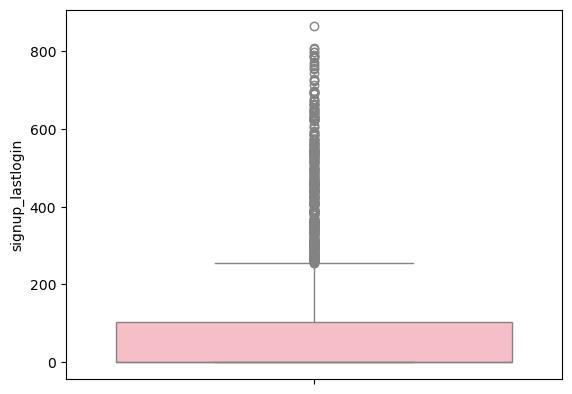

In [66]:
sns.boxplot(data = uncut["signup_lastlogin"], color = "lightpink")

In [67]:
uncut["signup_lastlogin"].describe()

count    14160.000000
mean        58.928249
std        102.390919
min         -1.000000
25%          0.000000
50%          0.000000
75%        102.000000
max        864.000000
Name: signup_lastlogin, dtype: float64

In [68]:
# Defining Churn:
# Many businesses set a prediction point of 60 days after the last login or interaction to identify churned customers. For Uncut let's consider 90 days

from datetime import datetime, timedelta

# Current date

user_input = input("Please enter the current date (YYYY-MM-DD): ")
current_date = pd.to_datetime(user_input)

# Calculate inactivity period and create churn column
uncut['is_churned'] = (current_date - uncut['Last Logged In At']) > timedelta(days=90)
uncut['is_churn_int'] = uncut['is_churned'].astype(int)
uncut.head()



,Record ID,First Name,Uncut User ID,# of Uncut NFT's created,Uncut Collectors #,Likes received,# of Uncut free NFT's collected,# of Uncut paid NFT's collected,Following #,Likes given,...,ArtX Balance,Creator Level XP,Social Level XP,Collector Level XP,Last Logged In At,ArtX Total Earned,ArtX Total Spent,signup_lastlogin,is_churned,is_churn_int
89,21312992807,unknown,4.296025e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.0,0.0,0.0,0.0,2024-05-14 19:41:00,84.0,0.0,0,False,0
90,21315101206,Sigyn Selene,4.296025e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,0.0,0.0,0.0,2024-05-14 20:27:00,75.0,0.0,0,False,0
91,21290567937,Joel Vivas,4.296025e+09,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2024-05-14 17:09:00,5.0,5.0,0,False,0
92,21269135013,NeoKat Generations,4.296025e+09,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,94.0,0.0,0.0,1.0,2024-05-14 15:21:00,99.0,5.0,0,False,0
93,21221308420,C,4.296025e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.0,0.0,0.0,0.0,2024-05-14 13:04:00,48.0,1.0,0,False,0


In [69]:
#uncut.to_csv('uncut_clean.csv')

#Selecting numerical columns only

uncut_numerical = uncut.select_dtypes('number')
uncut_numerical.drop(['Record ID', 'Uncut User ID'], axis=1, inplace=True)
uncut_numerical

,# of Uncut NFT's created,Uncut Collectors #,Likes received,# of Uncut free NFT's collected,# of Uncut paid NFT's collected,Following #,Likes given,Posts #,Comments #,Followers #,Blogs #,$'s Spent,ArtX Balance,Creator Level XP,Social Level XP,Collector Level XP,ArtX Total Earned,ArtX Total Spent,signup_lastlogin,is_churn_int
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,84.0,0.0,0.0,0.0,84.0,0.0,0,0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,75.0,0.0,0.0,0.0,75.0,0.0,0,0
91,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,0,0
92,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,94.0,0.0,0.0,1.0,99.0,5.0,0,0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,47.0,0.0,0.0,0.0,48.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16200,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,4.0,0.0,0.0,54.0,0.0,0.0,2.0,59.0,5.0,115,1
16201,32.0,1.0,27.0,8.0,0.0,8.0,16.0,0.0,1.0,15.0,0.0,0.0,0.0,136.0,2.0,7.0,0.0,0.0,0,1
16202,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,123.0,0.0,0.0,6.0,123.0,0.0,167,0
16203,7.0,5.0,12.0,625.0,3.0,52.0,583.0,15.0,9.0,44.0,0.0,0.0,646.0,37.0,69.0,644.0,1106.0,460.0,246,0


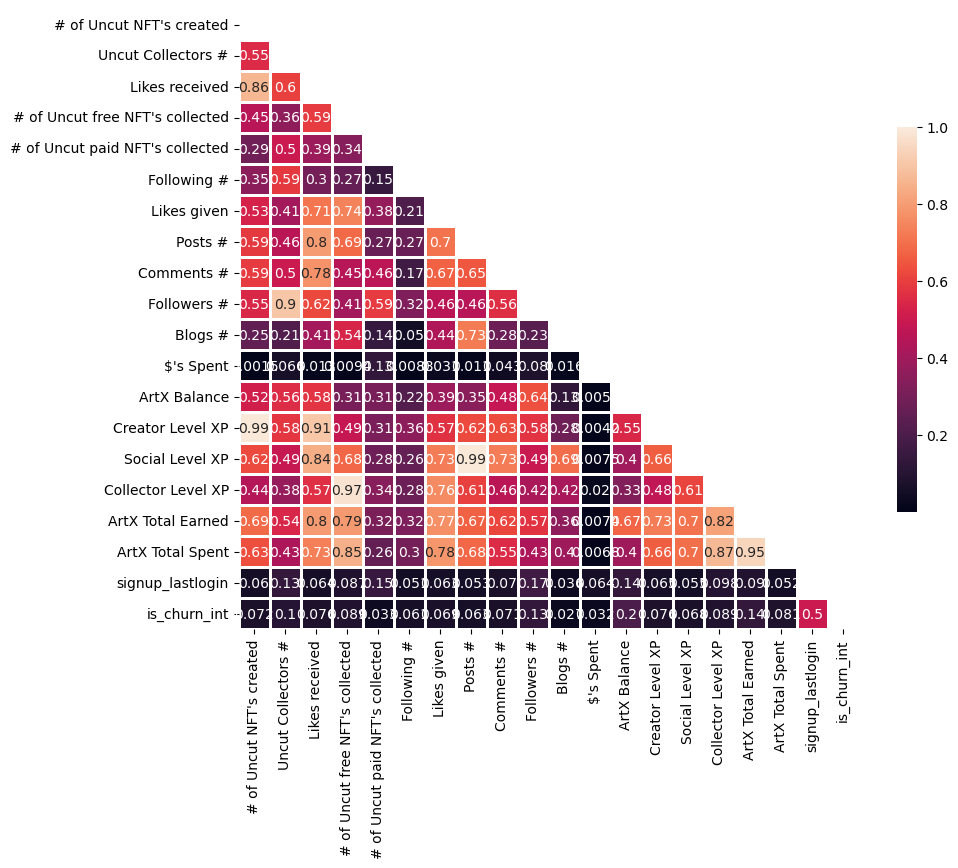

In [70]:
#Checking for correlation

corr = np.abs(uncut_numerical.corr())
#set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True
mask
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.8, cbar_kws={"shrink": .5},annot = corr)

plt.show()

#From this correlation map we can see that the features that have influence in the retain of a client are the ones linked with creation. If the user is a creator he is more likely to stay.


In [71]:
#Selecting only columns with more then 0.099 of correlation to is_churn (numerical variation). These are the features that will train our model.

threshold = 0.099
relevant_correlations = corr['is_churn_int']
high_correlation_results = relevant_correlations[relevant_correlations > threshold]
print(high_correlation_results)

Uncut Collectors #    0.102840
Followers #           0.134918
ArtX Balance          0.198315
ArtX Total Earned     0.135921
signup_lastlogin      0.498958
is_churn_int          1.000000
Name: is_churn_int, dtype: float64


In [72]:
# Train Test Split
target = uncut["is_churned"]
features = uncut[["Uncut Collectors #", "Followers #", "ArtX Balance", "ArtX Total Earned", "signup_lastlogin"]]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)

**Model Selection**

In [73]:
# We will be using KNN as our predictive model.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluating the model's performance

In [74]:
pred = knn.predict(X_test)

#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", knn.score(X_test, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.923728813559322
Precision: 0.9649890590809628
Recall: 0.9206680584551148


In [75]:
pred_ft = knn.predict(features)
confusion_matrix(y_test, pred)

array([[ 852,   64],
       [ 152, 1764]])

In [76]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.85      0.93      0.89       916
        True       0.96      0.92      0.94      1916

    accuracy                           0.92      2832
   macro avg       0.91      0.93      0.91      2832
weighted avg       0.93      0.92      0.92      2832



## Normalization

In [77]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
normalizer = RobustScaler()
#normalizer = StandardScaler()
normalizer.fit(X_train)

RobustScaler()

In [78]:
#Transforming our training and testing data

X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [79]:
# KNN Regressor - modeling
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 10)

In [80]:
# Training KNN to our normalized data
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

## Evaluating the normalized model's performance

In [85]:
# Evaluate model's performance
pred = knn.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", knn.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.7283141734508756
Precision: 0.9775280898876404
Recall: 0.9081419624217119


## Linear Regression

In [88]:
# Creating an instance of Linear Regression model.
lin_reg = LinearRegression()

In [92]:
# Training Linear Regression with our normalized data
lin_reg.fit(X_train_norm, y_train)

LinearRegression()

In [94]:
# Evaluate model's performance

pred = lin_reg.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", lin_reg.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.2664062880761492
Precision: 0.826265389876881
Recall: 0.9457202505219207


## Logistic Regression

In [134]:
log_reg = LogisticRegression()

In [135]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [136]:
pred = log_reg.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", log_reg.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.676906779661017
Precision: 0.6767926527728718
Recall: 1.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision Tree

In [95]:
tree = DecisionTreeRegressor(max_depth = 10)

In [96]:
tree.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=10)

In [97]:
pred = tree.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", tree.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.7318297475564806
Precision: 0.9754738015607581
Recall: 0.9133611691022965


## Bagging

In [98]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth = 10),
                                                     n_estimators = 100,
                                                     max_samples = 1000,
                                                     bootstrap=True)

In [99]:
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                 max_samples=1000, n_estimators=100)

In [100]:
pred = bagging_reg.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", bagging_reg.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.7745794076014109
Precision: 0.9914821124361158
Recall: 0.9112734864300627


## Pasting

In [ ]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth = 10),
                                                     n_estimators = 100,
                                                     max_samples = 1000,
                                                     bootstrap=False)

In [101]:
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                 max_samples=1000, n_estimators=100)

In [102]:
pred = bagging_reg.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", bagging_reg.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.7739631406957539
Precision: 0.9909348441926346
Recall: 0.912839248434238


## Random Patches - Random Forest

In [103]:
forest = RandomForestRegressor(n_estimators=100,
                               max_depth=20)

In [104]:
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=20)

In [105]:
pred = forest.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", forest.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.764109530803599
Precision: 0.9672846237731734
Recall: 0.9258872651356994


## AdaBoost

In [106]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [107]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [108]:
pred = ada_reg.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", ada_reg.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.4904395926088807
Precision: 0.9553042541733979
Recall: 0.9258872651356994


## Gradient Boosting

In [109]:
gb_reg = GradientBoostingRegressor(n_estimators=100,
                                   max_depth=20)

In [110]:
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

In [111]:
pred = gb_reg.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", gb_reg.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.6794942385794486
Precision: 0.9450897571277719
Recall: 0.9342379958246346


## XGBOOST

In [112]:
model = xgb.XGBRegressor(max_depth=20,
                         n_estimators=100)

In [113]:
model.fit(X_train_norm, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [114]:
pred = model.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", model.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.7240182499453163
Precision: 0.9565916398713826
Recall: 0.9316283924843424


# Grid Search

In [137]:
grid = {"n_estimators": [50, 100, 200,500],
        "estimator__max_leaf_nodes": [250, 500, 1000, None],
        "estimator__max_depth":[10,30,50]}

In [138]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

In [139]:
model = GridSearchCV(estimator = ada_reg, param_grid = grid, cv=5)

In [120]:
model.fit(X_train_norm, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
             param_grid={'estimator__max_depth': [10, 30, 50],
                         'estimator__max_leaf_nodes': [250, 500, 1000, None],
                         'n_estimators': [50, 100, 200, 500]})

In [121]:
model.best_params_

{'estimator__max_depth': 10,
 'estimator__max_leaf_nodes': 500,
 'n_estimators': 50}

In [122]:
best_model = model.best_estimator_

In [123]:
best_model.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                  max_leaf_nodes=500))

In [124]:
pred = best_model.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", best_model.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.6305555142614634
Precision: 0.9355509355509356
Recall: 0.9394572025052192


## Trying GRID with not normalized data

In [140]:
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
             param_grid={'estimator__max_depth': [10, 30, 50],
                         'estimator__max_leaf_nodes': [250, 500, 1000, None],
                         'n_estimators': [50, 100, 200, 500]})

In [141]:
model.best_params_

{'estimator__max_depth': 10,
 'estimator__max_leaf_nodes': 500,
 'n_estimators': 50}

In [142]:
best_model = model.best_estimator_

In [143]:
best_model.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                  max_leaf_nodes=500))

In [144]:
pred = best_model.predict(X_test)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", best_model.score(X_test, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.3858755332397328
Precision: 0.8557046979865772
Recall: 0.9316283924843424


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


# Random Search

In [125]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 500, stop = 3000, num = 10)],
        "estimator__max_depth":[int(x) for x in np.linspace(10, 110, num = 11)]}

In [128]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [129]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110],
                                        'estimator__max_leaf_nodes': [500, 777,
                                                                      1055,
                                                                      1333,
                                                                      1611,
                                                                      1888,
                                                                      2166,
                                                                      2444,
                                                                      2722,
                                                                      3000],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [130]:
model.best_params_

{'n_estimators': 200,
 'estimator__max_leaf_nodes': 3000,
 'estimator__max_depth': 70}

In [131]:
best_model = model.best_estimator_

In [132]:
pred = best_model.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)
#For CHURN prediction the RECALL is the most valiable metric

# Calculate Accuracy
print("Accuracy", best_model.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')

Accuracy 0.4614937615262169
Precision: 0.9523043944265809
Recall: 0.9274530271398748
